<a href="https://colab.research.google.com/github/StevenChen0603/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

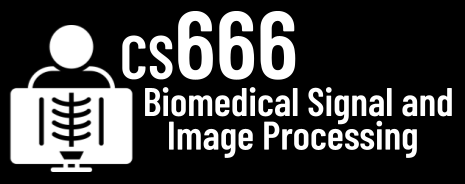

# Assignment 1

In [189]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [190]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [191]:
from biosppy import storage
! wget "https://cs666.org/data/ecg.txt"
signal, metadata = storage.load_txt('ecg.txt')

--2024-02-19 23:17:44--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt.2’

ecg.txt.2           100%[===================>] 102.62K  --.-KB/s    in 0.02s   

2024-02-19 23:17:44 (4.99 MB/s) - ‘ecg.txt.2’ saved [105085/105085]



**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [192]:
SAMPLING_RATE = metadata["sampling_rate"] ### TODO!
SECONDS = len(signal)/SAMPLING_RATE ### TODO!
print(SAMPLING_RATE)
print(SECONDS)

1000.0
15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

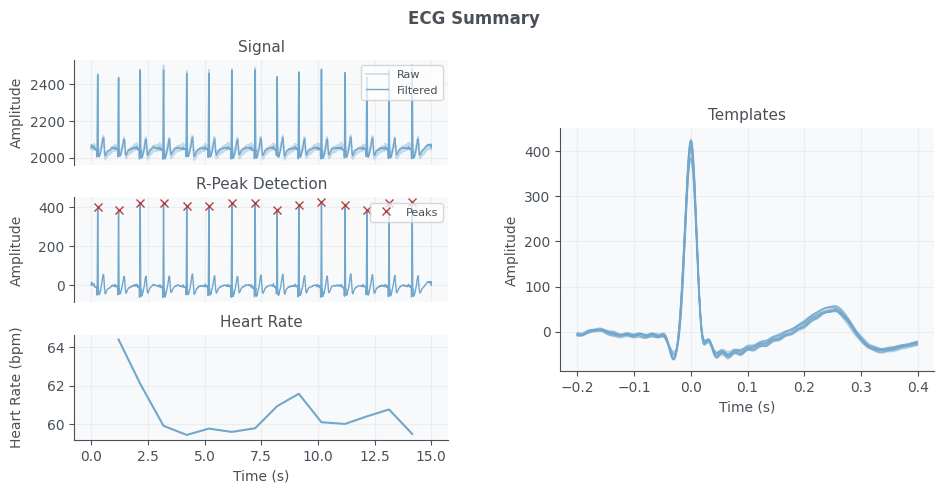

ReturnTuple(ts=array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.4997e+01, 1.4998e+01,
       1.4999e+01]), filtered=array([-0.50199549,  2.3546002 ,  5.11019598, ...,  6.38401982,
        2.99312361, -0.52551572]), rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]), templates_ts=array([-2.00000000e-01, -1.99000000e-01, -1.98000000e-01, -1.97000000e-01,
       -1.96000000e-01, -1.95000000e-01, -1.94000000e-01, -1.93000000e-01,
       -1.92000000e-01, -1.91000000e-01, -1.90000000e-01, -1.89000000e-01,
       -1.88000000e-01, -1.87000000e-01, -1.86000000e-01, -1.85000000e-01,
       -1.84000000e-01, -1.83000000e-01, -1.82000000e-01, -1.81000000e-01,
       -1.80000000e-01, -1.79000000e-01, -1.78000000e-01, -1.77000000e-01,
       -1.76000000e-01, -1.75000000e-01, -1.74000000e-01, -1.73000000e-01,
       -1.72000000e-01, -1.71000000e-01, -1.70000000e-01, -1.69000000e-01,
       -1.68000000e-01, -1.67000000e-01, -1

In [193]:
import biosppy
biosppy.signals.ecg.ecg(signal, sampling_rate= SAMPLING_RATE)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

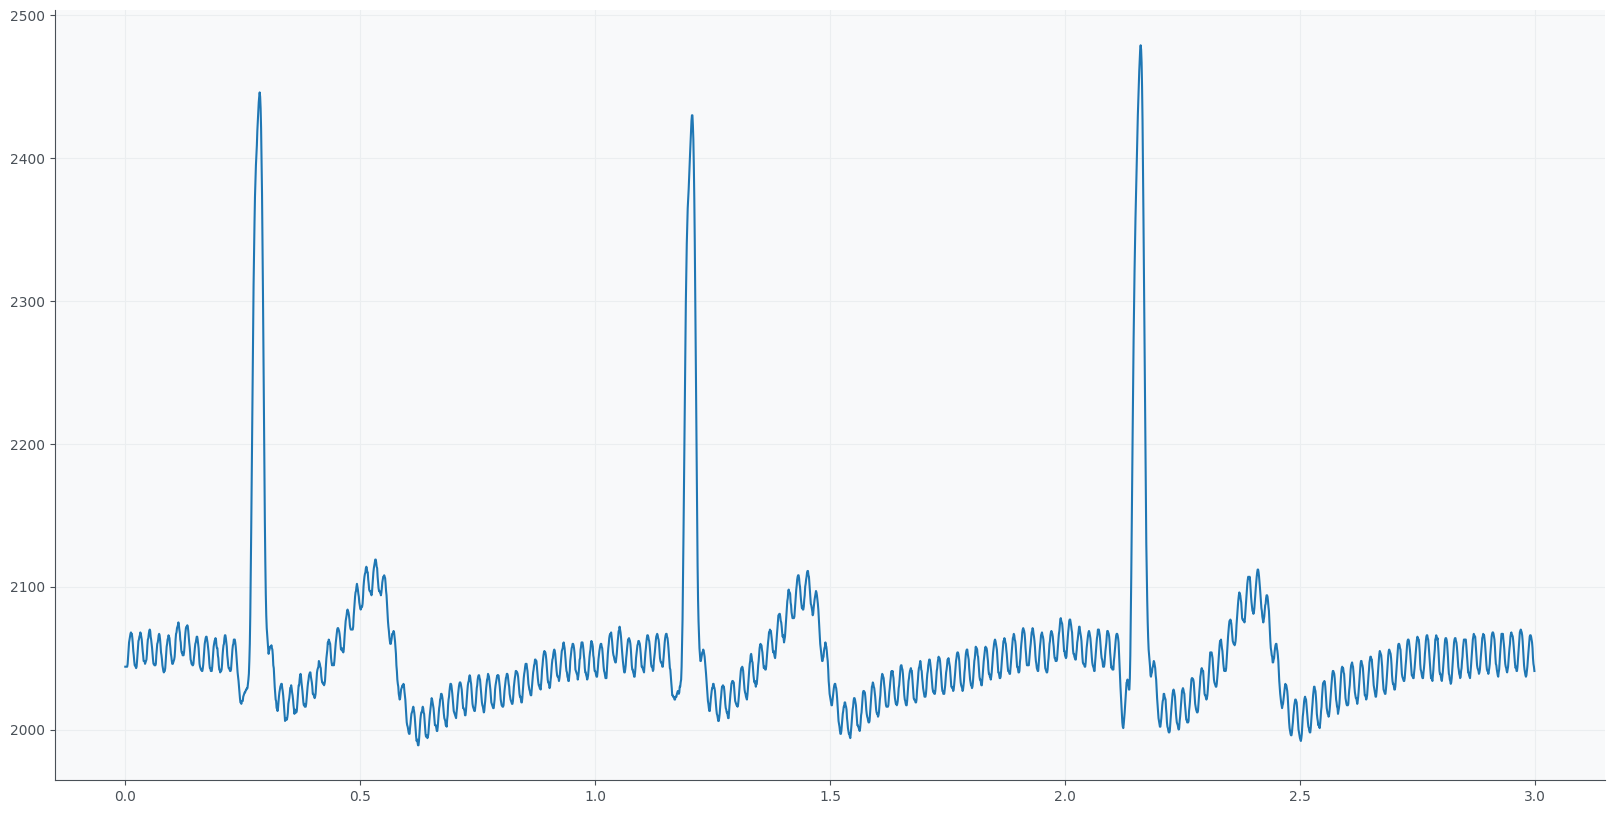

In [194]:
### TODO plot unfiltered signal
time = [i / SAMPLING_RATE for i in range(len(signal))]
plt.plot(time[:int(3*SAMPLING_RATE)], signal[:int(3*SAMPLING_RATE)])

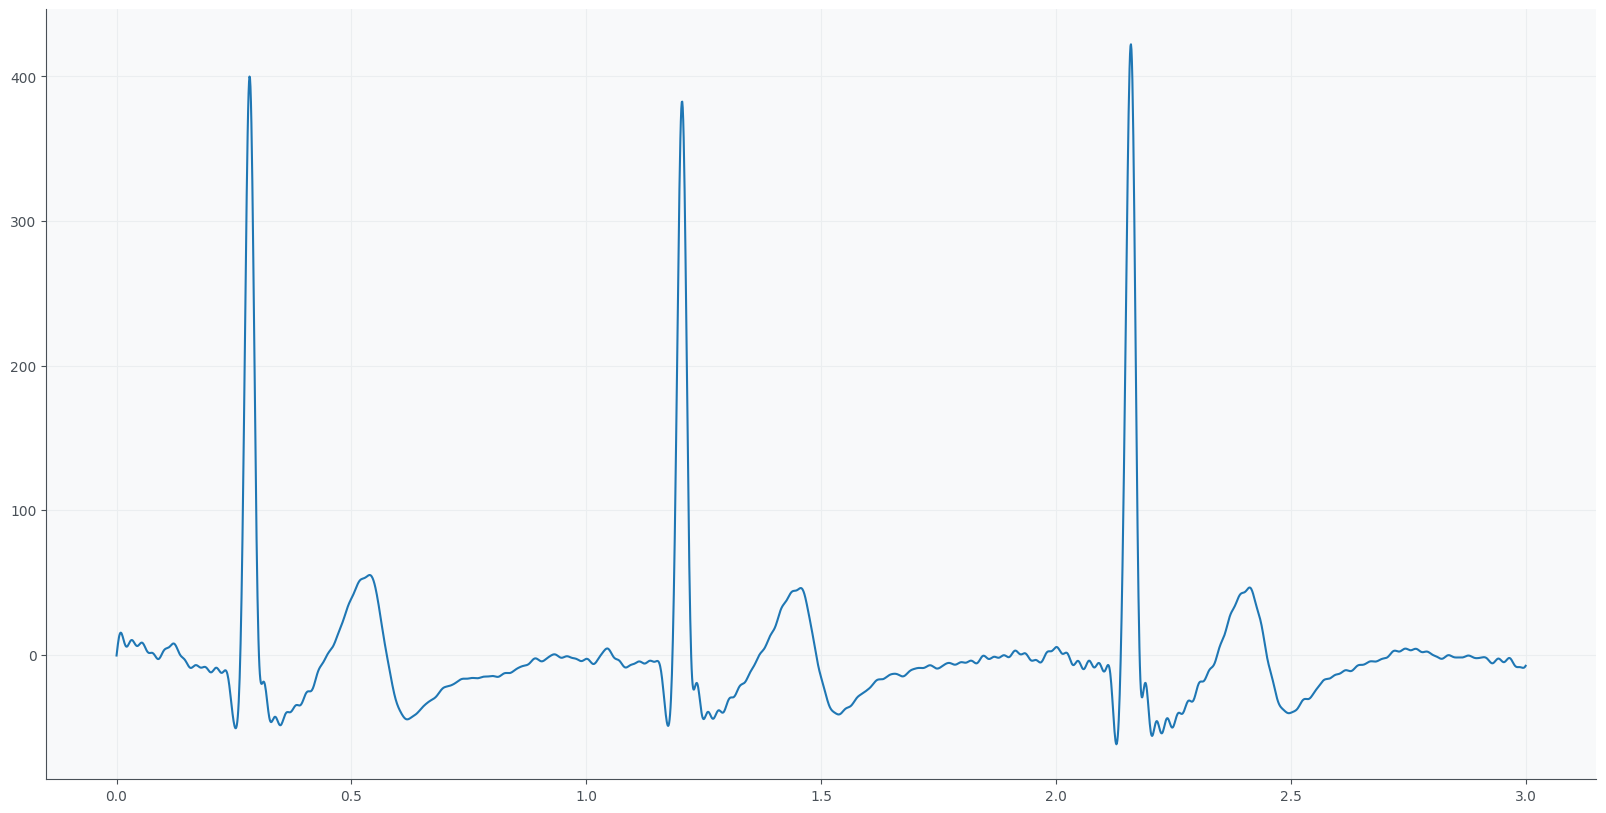

In [195]:
### TODO plot filtered signal
filtered_signal = biosppy.signals.ecg.ecg(signal, sampling_rate=SAMPLING_RATE, show = None)

plt.plot(time[:int(3*SAMPLING_RATE)],filtered_signal["filtered"][:int(3*SAMPLING_RATE)])

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

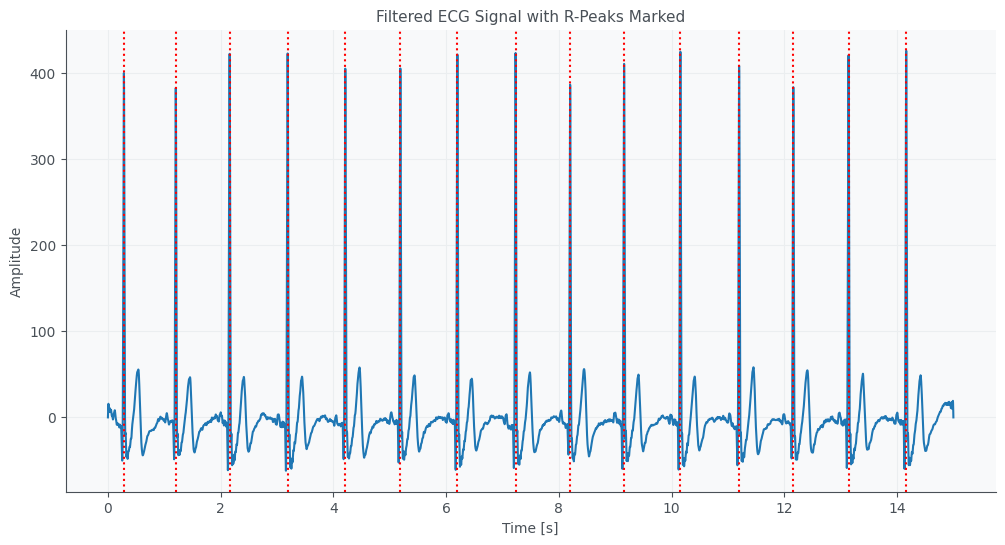

In [209]:
### TODO
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_signal["filtered"])
plt.title('Filtered ECG Signal with R-Peaks Marked')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)


def detected_rpeaks(rpeaks_list):
  for rpeak in rpeaks_list:
      plt.axvline(x=time[rpeak], color='r', ls=':')
detected_rpeaks(filtered_signal["rpeaks"])
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [197]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

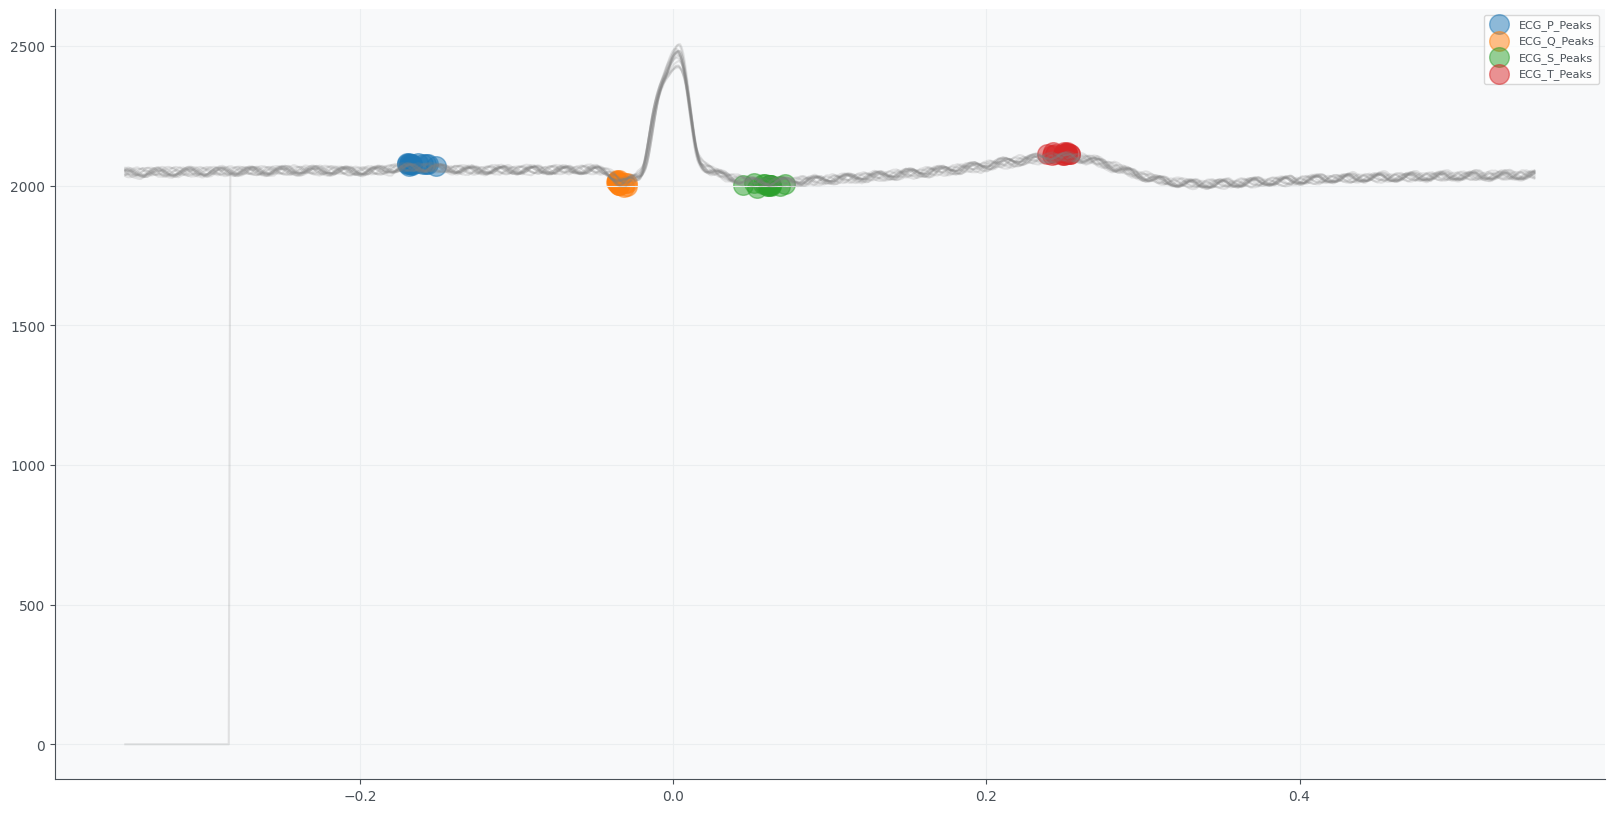

In [207]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

import neurokit2 as nk
_, waves_peak1 = nk.ecg_delineate(signal, filtered_signal["rpeaks"], sampling_rate=SAMPLING_RATE, show=True, method="peak")

In [208]:
# TODO Does the detection work well?
# Answer: Yes the dection does work but not well because it's not very accurate.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

rpeaks are: [  283  1203  2158  3188  4211  5188  6200  7232  8200  9157 10155 11198
 12159 13139 14162]


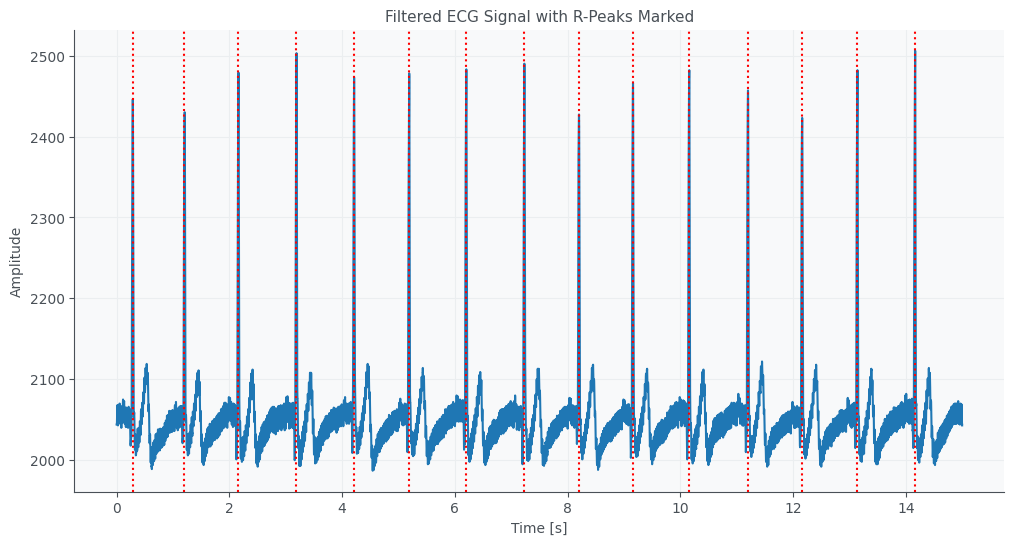

In [200]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
!pip install sleepecg
import sleepecg
rpeaks = sleepecg.detect_heartbeats(signal, fs=SAMPLING_RATE)
plt.figure(figsize=(12, 6))
plt.plot(time, signal)
plt.title('Filtered ECG Signal with R-Peaks Marked')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
detected_rpeaks(rpeaks)
print("rpeaks are:", rpeaks)
plt.show()

In [201]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

# Answer:Yes, biosppy and sleepecg do give different rpeaks but it's only few rpeaks is different.
MSE = np.square(np.subtract(rpeaks,filtered_signal["rpeaks"])).mean()
print(MSE)

0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

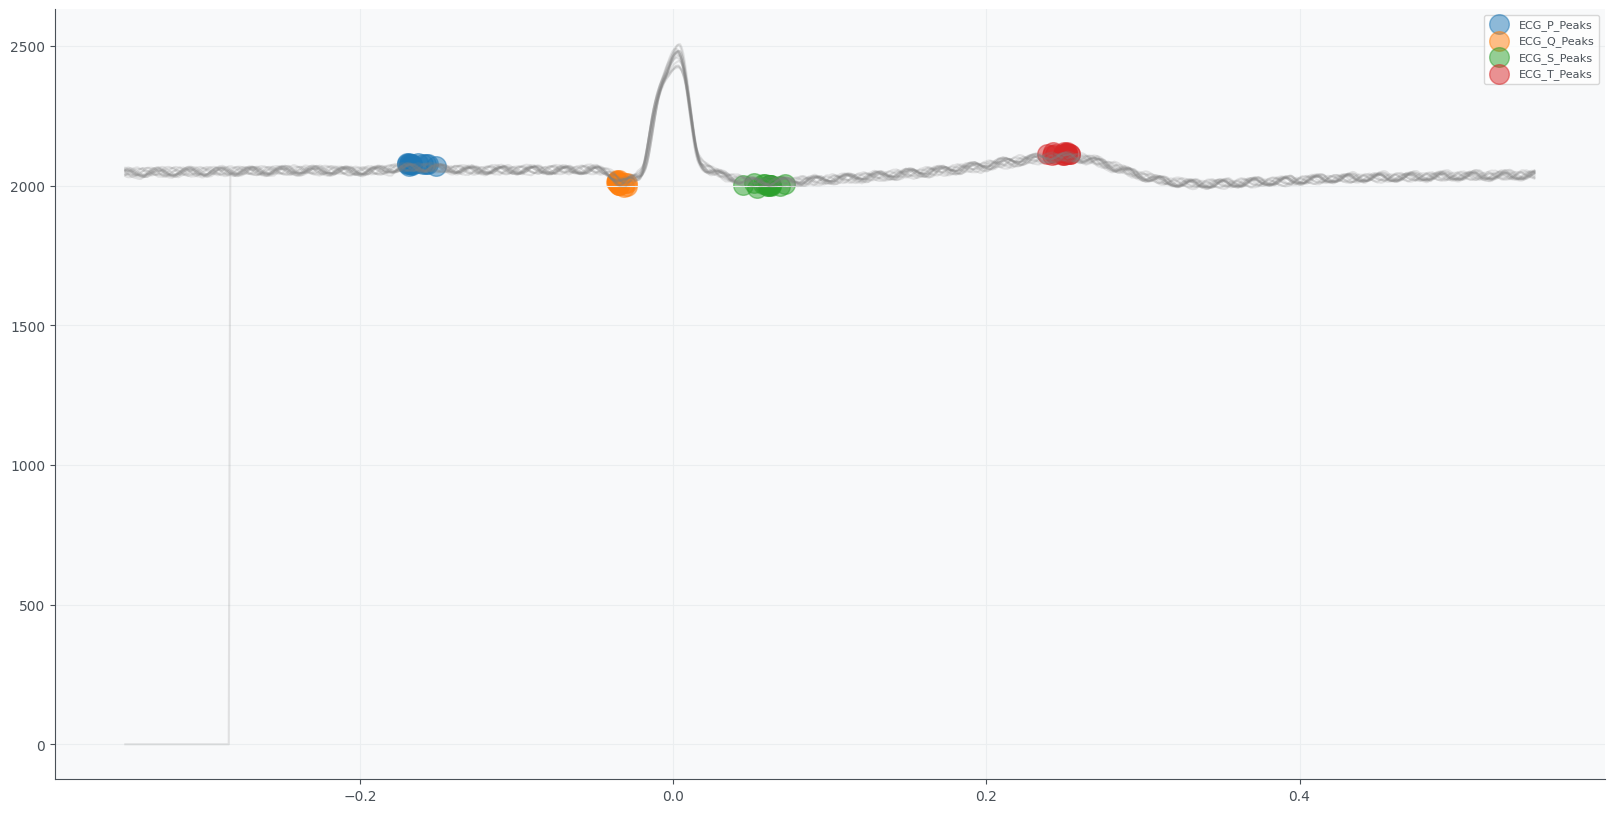

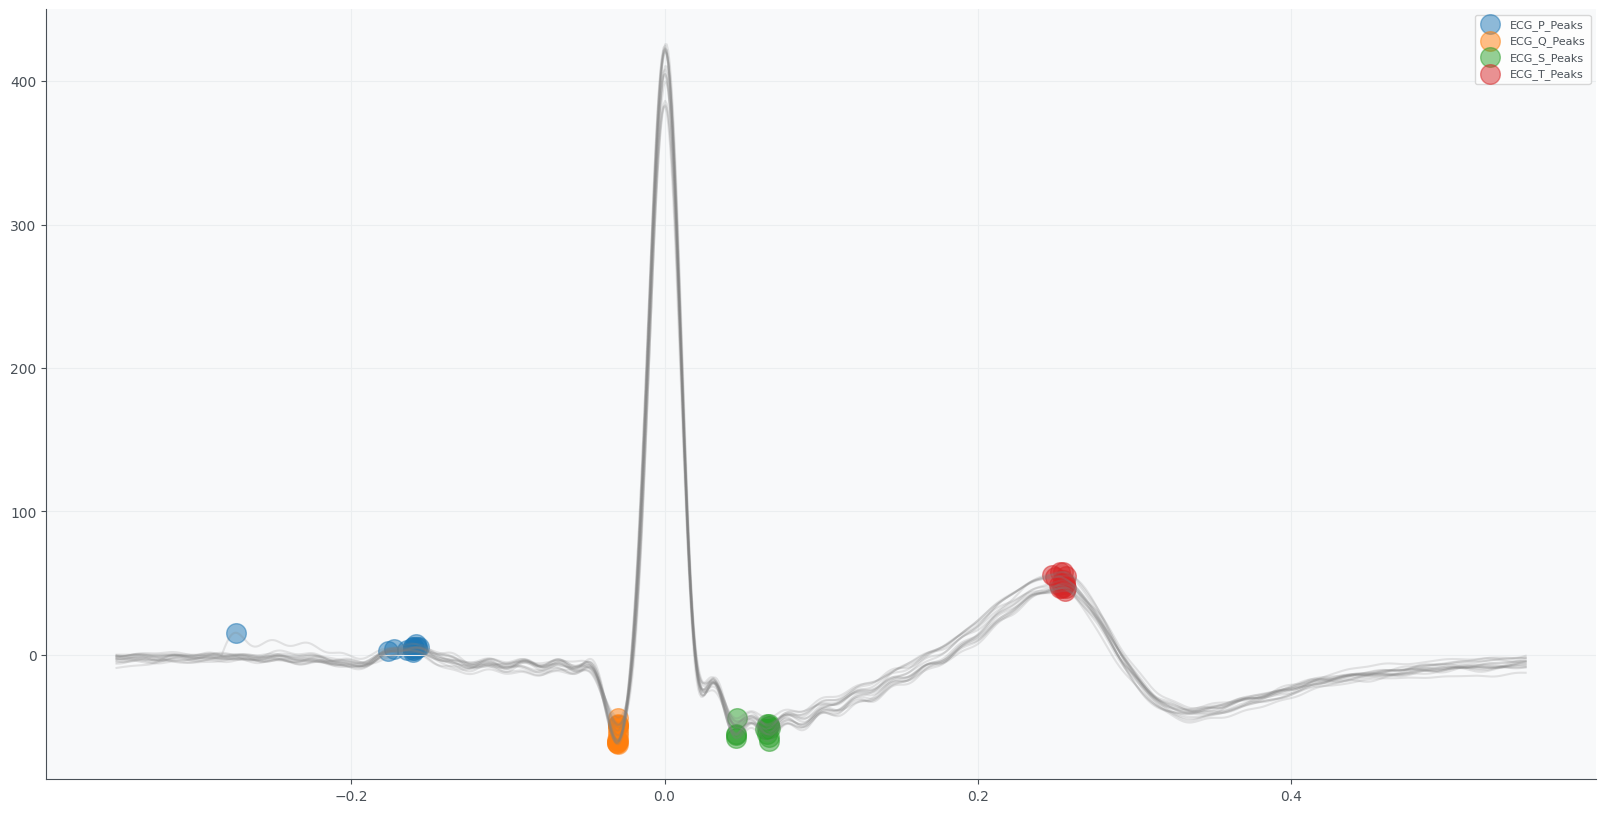

In [202]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak3 = nk.ecg_delineate(signal, filtered_signal["rpeaks"], sampling_rate=SAMPLING_RATE, show=True, method="peak")
_, waves_peak4 = nk.ecg_delineate(filtered_signal["filtered"], filtered_signal["rpeaks"], sampling_rate=SAMPLING_RATE, show=True, method="peak")

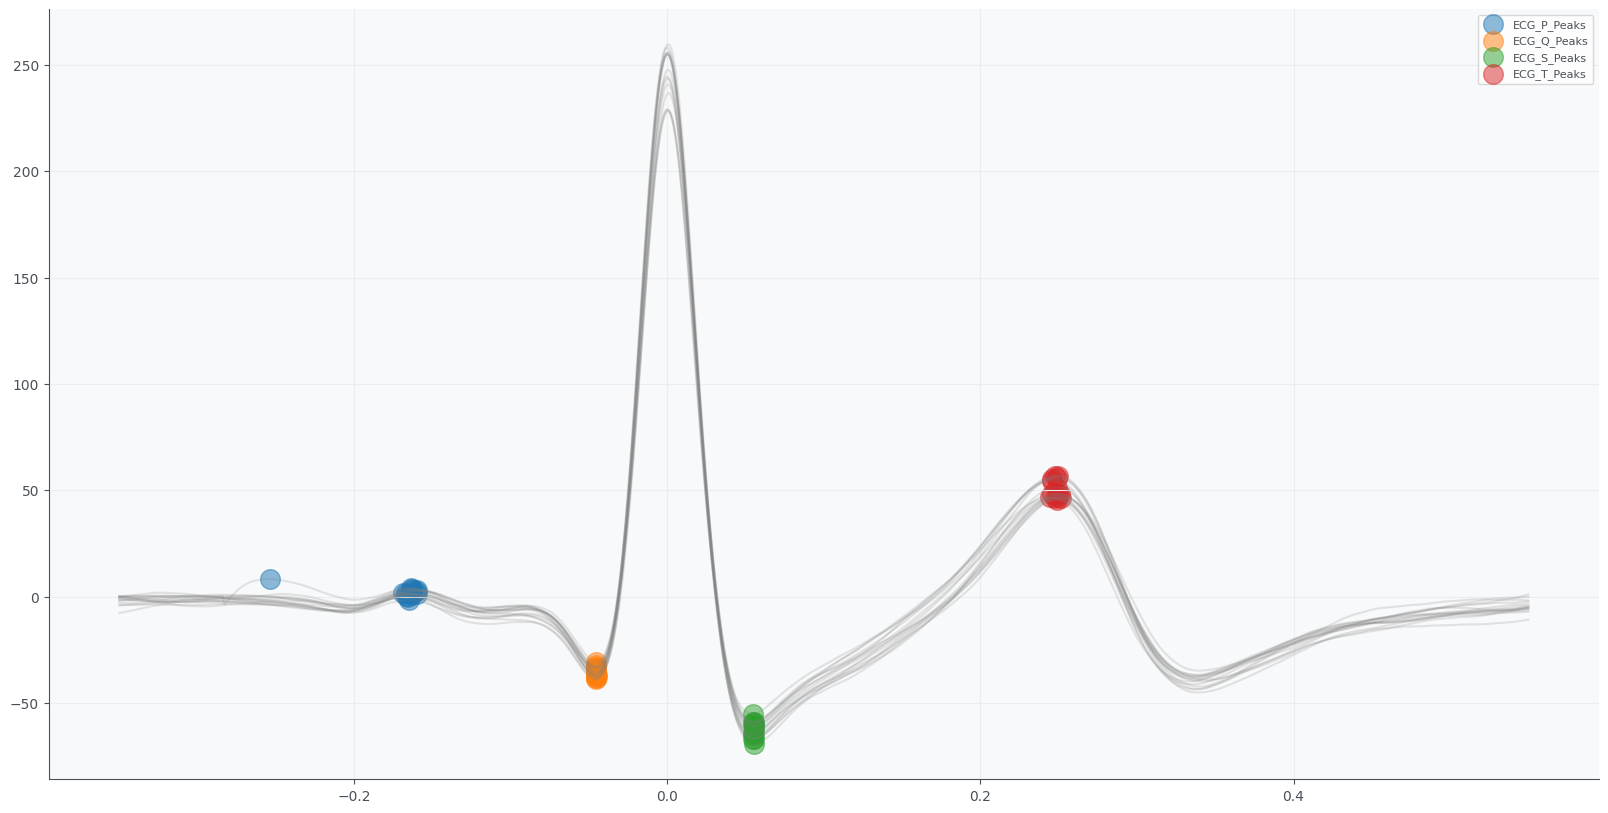

In [203]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered = nk.signal_filter(signal, sampling_rate=int(SAMPLING_RATE), lowcut=1, highcut=15)
_, waves_peak5 = nk.ecg_delineate(filtered, filtered_signal["rpeaks"], sampling_rate=SAMPLING_RATE, show=True, method="peak")

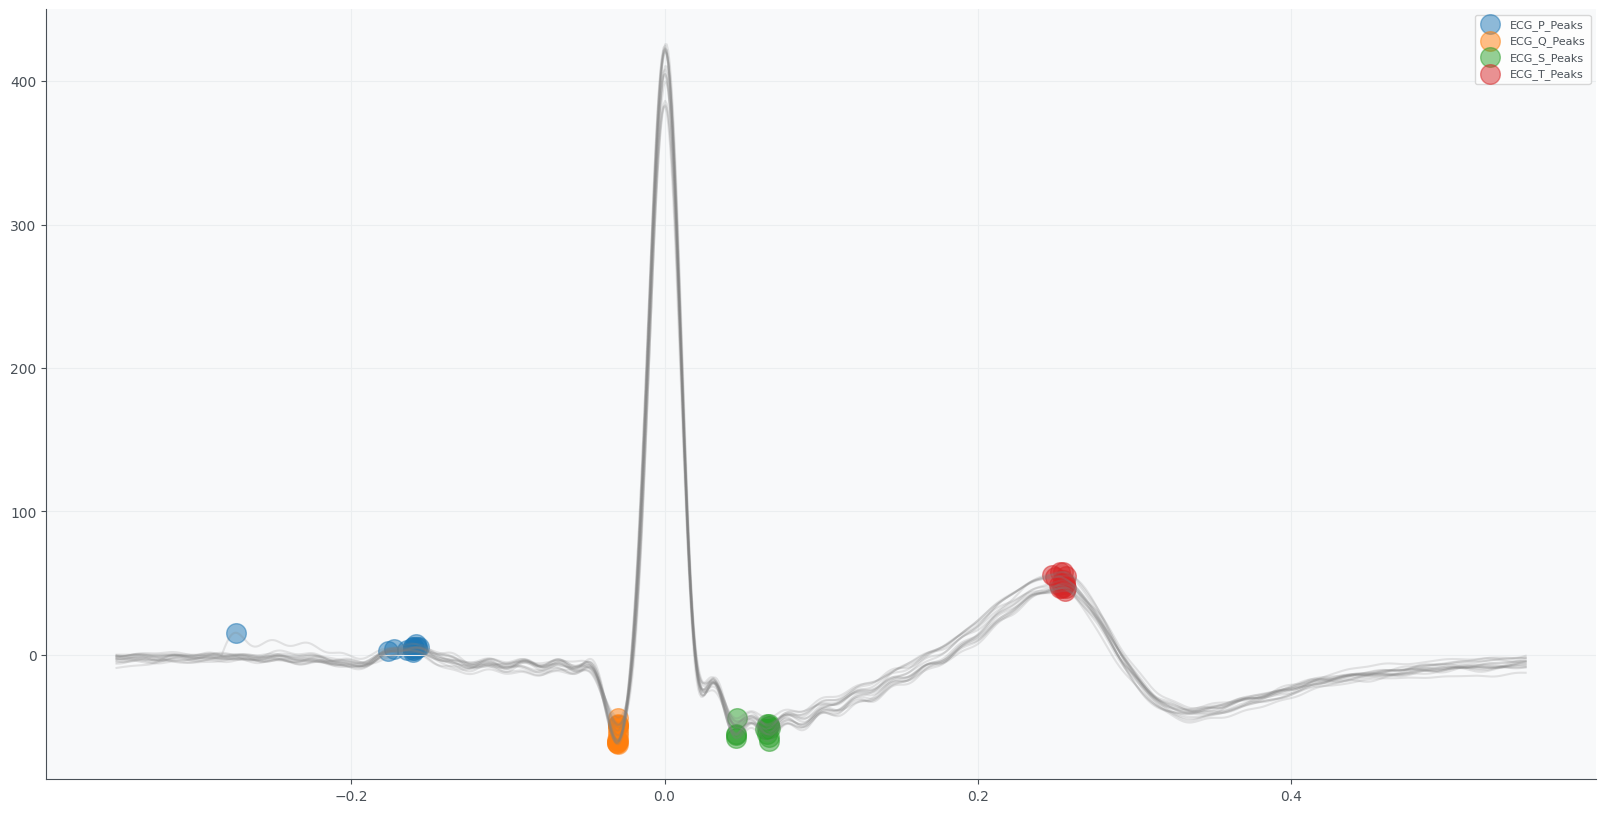

In [204]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak6 = nk.ecg_delineate(filtered_signal["filtered"], filtered_signal["rpeaks"], sampling_rate=SAMPLING_RATE, show=True, method="peak")

In [205]:
# TODO Which one works the best?
# Answer: The one after I used the band-pass filtered. I have more accurate detection on the P,Q,S,T Peaks.

In [206]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#